# Discrete A/B Test

Prior Distribution:
- A Beta prior with parameters \(\alpha_{\text{prior}} = 1\) and \(\beta_{\text{prior}} = 1\), representing a uniform distribution (non-informative prior).

Posterior Distribution:
- Posterior parameters for the Beta distribution are calculated as follows:

$$
\alpha_{\text{post}} = \alpha_{\text{prior}} + \text{successes}
$$

$$
\beta_{\text{post}} = \beta_{\text{prior}} + (\text{trials} - \text{successes})
$$

Bayes Factor:
- The Bayes Factor is calculated to quantify the evidence in favor of the control group having a better conversion rate than the treatment group:

$$
\text{BF} = \frac{P(\text{control\_samples} > \text{treatment\_samples})}{P(\text{control\_samples} \leq \text{treatment\_samples})}
$$

In [1]:
# Experiment outcomes (PLAY WITH THIS)
control_successes = 32
control_trials = 1721
treatment_successes = 10
treatment_trials = 574

# Define prior parameters for Beta distribution
alpha_prior = 1
beta_prior = 1

95% Credible Intervals for Conversion Rates:
Control Group: [1.33%, 2.62%]
Treatment Group: [0.95%, 3.20%]

Mean Conversion Rates:
Control Group: 1.91%
Treatment Group: 1.91%

The credible intervals overlap, indicating no significant difference between the groups.
Bayes Factor (Control better than Treatment): 1.11


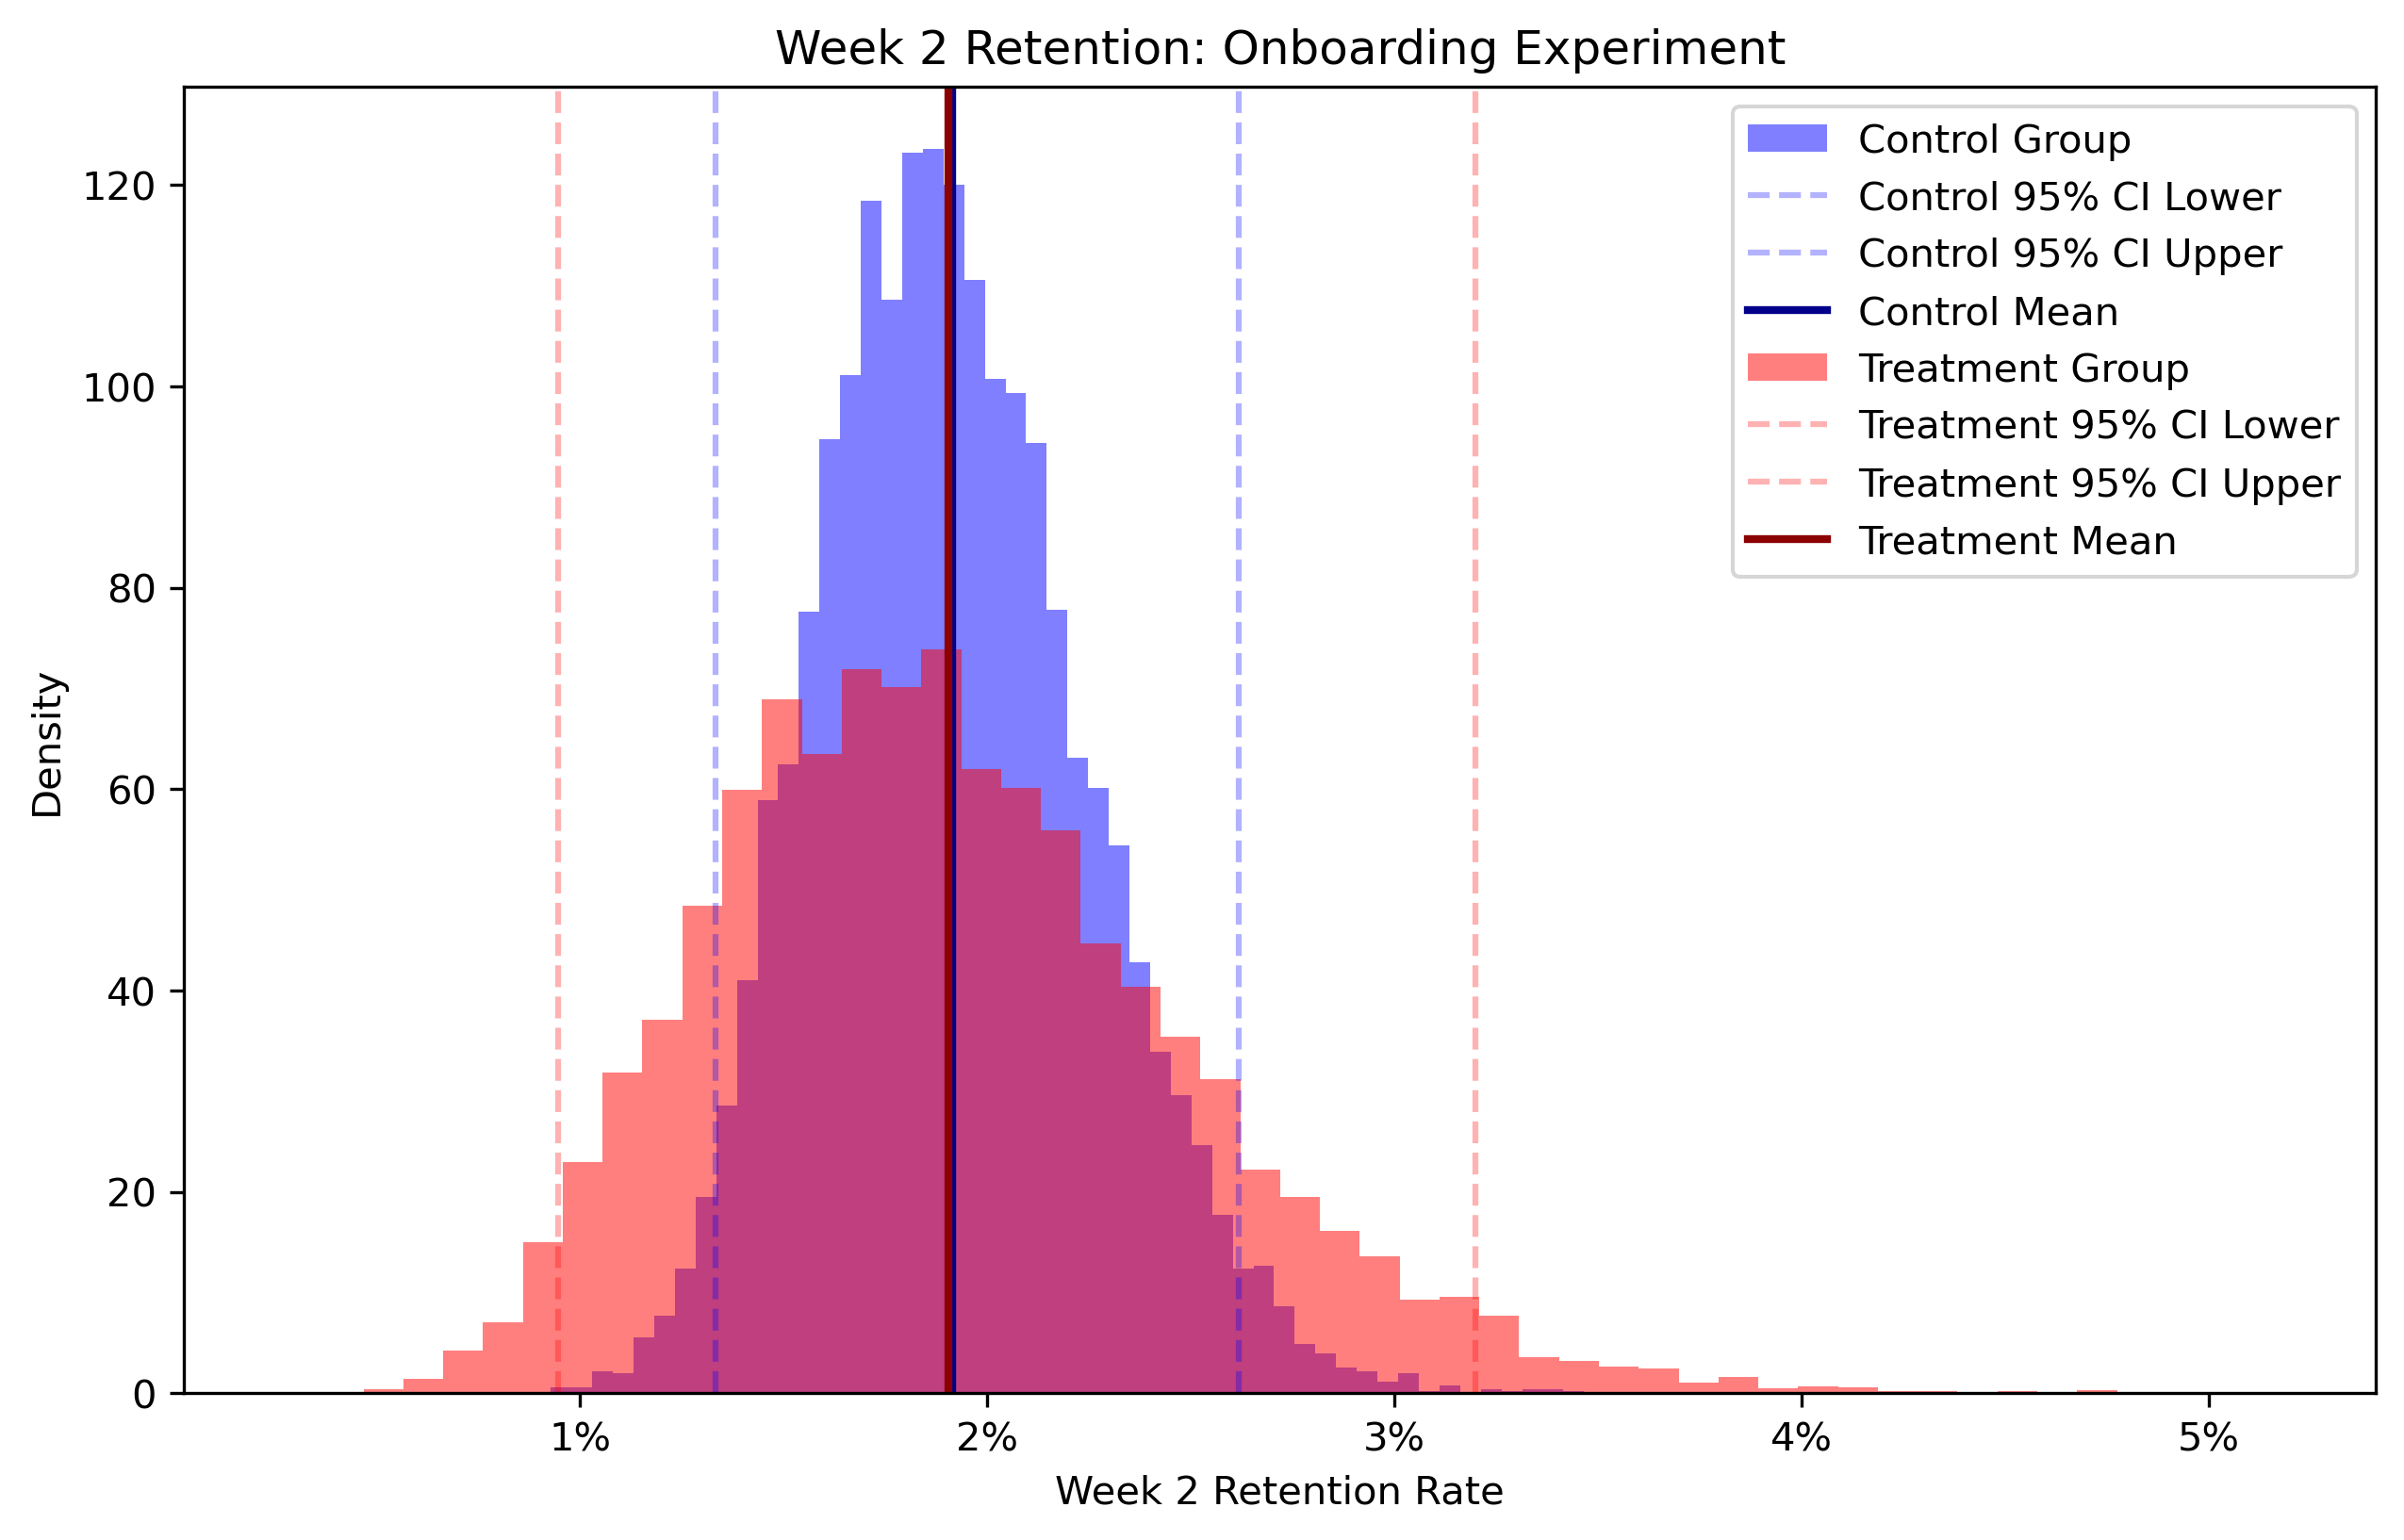

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate posterior parameters for Beta distributions
alpha_post_control = alpha_prior + control_successes
beta_post_control = beta_prior + (control_trials - control_successes)

alpha_post_treatment = alpha_prior + treatment_successes
beta_post_treatment = beta_prior + (treatment_trials - treatment_successes)

# Number of samples
num_samples = 10000

# Sample from the Beta distributions
control_samples = np.random.beta(alpha_post_control, beta_post_control, num_samples)
treatment_samples = np.random.beta(alpha_post_treatment, beta_post_treatment, num_samples)

# Calculate means
control_mean = np.mean(control_samples)
treatment_mean = np.mean(treatment_samples)

# Calculate 95% credible intervals
control_credible_intervals = np.percentile(control_samples, [2.5, 97.5])
treatment_credible_intervals = np.percentile(treatment_samples, [2.5, 97.5])

# Output the credible intervals and means as percentages
print("95% Credible Intervals for Conversion Rates:")
print("Control Group: [{:.2f}%, {:.2f}%]".format(control_credible_intervals[0] * 100, control_credible_intervals[1] * 100))
print("Treatment Group: [{:.2f}%, {:.2f}%]".format(treatment_credible_intervals[0] * 100, treatment_credible_intervals[1] * 100))

print()

print("Mean Conversion Rates:")
print("Control Group: {:.2f}%".format(control_mean * 100))
print("Treatment Group: {:.2f}%".format(treatment_mean * 100))

print()

# Check if credible intervals overlap
control_lower, control_upper = control_credible_intervals
treatment_lower, treatment_upper = treatment_credible_intervals

if control_upper < treatment_lower or treatment_upper < control_lower:
    print("The credible intervals do not overlap, indicating a significant difference between the groups.")
else:
    print("The credible intervals overlap, indicating no significant difference between the groups.")

# Calculate Bayes Factor
p_control_better = np.mean(control_samples > treatment_samples)
p_treatment_better = 1 - p_control_better
bayes_factor = p_control_better / p_treatment_better

print("Bayes Factor (Control better than Treatment): {:.2f}".format(bayes_factor))

# Plot the distributions
plt.figure(figsize=(10, 6), dpi=300)

# Plot control group distribution
plt.hist(control_samples, bins=50, alpha=0.5, label='Control Group', color='blue', density=True)
plt.axvline(x=control_credible_intervals[0], color='blue', linestyle='--', alpha=0.3, label='Control 95% CI Lower')
plt.axvline(x=control_credible_intervals[1], color='blue', linestyle='--', alpha=0.3, label='Control 95% CI Upper')
plt.axvline(x=control_mean, color='darkblue', linestyle='-', linewidth=2, label='Control Mean')

# Plot treatment group distribution
plt.hist(treatment_samples, bins=50, alpha=0.5, label='Treatment Group', color='red', density=True)
plt.axvline(x=treatment_credible_intervals[0], color='red', linestyle='--', alpha=0.3, label='Treatment 95% CI Lower')
plt.axvline(x=treatment_credible_intervals[1], color='red', linestyle='--', alpha=0.3, label='Treatment 95% CI Upper')
plt.axvline(x=treatment_mean, color='darkred', linestyle='-', linewidth=2, label='Treatment Mean')

# Add labels and title
plt.xlabel('Week 2 Retention Rate')
plt.ylabel('Density')
plt.title('Week 2 Retention: Onboarding Experiment')
plt.legend()

# Set x-axis to percentage format
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Show the plot
plt.show()